# First Submission: Solving Human Resources Problems

* Name: Siti Robiiatul Adawiyyah
* E-mail: adawiyyahsitirobiatul@gmail.com
* Dicoding ID: sitrobiiatul

# Preparation

## Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and splitting
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.metrics import classification_report

# Model saving and loading
import joblib
from joblib import dump, load

## Loading the Dataset

In [ ]:
df = pd.read_csv("/content/employee_data.csv")

In [ ]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Preparation

### Dataset Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

The data contains demographic details, work-related metrics and attrition flag.

* EmployeeId - Employee Identifier
* Attrition - Did the employee attrition? (0=no, 1=yes)
* Age - Age of the employee
* BusinessTravel - Travel commitments for the job
* DailyRate - Daily salary
* Department - Employee Department
* DistanceFromHome - Distance from work to home (in km)
* Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* EducationField - Field of Education
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* Gender - Employee's gender
* HourlyRate - Hourly salary
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level of job (1 to 5)
* JobRole - Job Roles
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* MaritalStatus - Marital Status
* MonthlyIncome - Monthly salary
* MonthlyRate - Mounthly rate
* NumCompaniesWorked - Number of companies worked at
* Over18 - Over 18 years of age?
* OverTime - Overtime?
* PercentSalaryHike - The percentage increase in salary last year
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* StandardHours - Standard Hours
* StockOptionLevel - Stock Option Level
* TotalWorkingYears - Total years worked
* TrainingTimesLastYear - Number of training attended last year
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Years at Company
* YearsInCurrentRole - Years in the current role
* YearsSinceLastPromotion - Years since the last promotion
* YearsWithCurrManager - Years with the current manager

In [ ]:
for feature in df.select_dtypes(include='object'):
    print(feature)
    print(df[feature].unique(), '\n')

BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Department
['Human Resources' 'Research & Development' 'Sales'] 

EducationField
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender
['Male' 'Female'] 

JobRole
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

MaritalStatus
['Married' 'Single' 'Divorced'] 

Over18
['Y'] 

OverTime
['Yes' 'No'] 



In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


From the descriptive analysis, it is observed that the Over18 feature contains only a single unique value, namely "Y", which stands for "Yes" indicating that all employees are confirmed to be over 18 years old. Similarly, the EmployeeCount attribute also shows no variation, having only one distinct value. Since both features lack variability and do not contribute meaningful information to distinguish between employees, they can be safely removed from the dataset without impacting the analysis or the modeling objectives.

In [ ]:
df = df.drop(['Over18', 'EmployeeCount'], axis=1)
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,4,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,2,80,1,6,0,3,4,2,0,0


### Missing Value & Duplicate Data Handling

#### Check for missing value

In [ ]:
print(df.isnull().sum())

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSin

Only the Attrition feature has missing values (412 entries), which is critical because it is the target variable.
To avoid bias, I will drop the rows with missing Attrition values instead of imputing them.

In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [ ]:
df.shape

(1058, 33)

#### Check for data duplicates

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['Attrition'].dtypes

dtype('float64')

In [ ]:
# Convert Attrition column to integer type
df['Attrition'] = df['Attrition'].astype(int)
print(df['Attrition'].dtype)

int64


### Ordinal Decoding

In [ ]:
def decode_ordinal_features(df):
    """
    Map ordinal encoded features to meaningful categorical labels.

    Parameters:
        df (pandas.DataFrame): The DataFrame to modify.

    Returns:
        pandas.DataFrame: DataFrame with updated categorical features.
    """

    mappings = {
        'Attrition': {0: 'No', 1: 'Yes'},
        'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'},
        'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
        'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
        'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
        'RelationshipSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
        'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
        'WorkLifeBalance': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
    }

    for feature, mapping in mappings.items():
        if feature in df.columns:
            df[feature] = df[feature].map(mapping)

    return df

In [ ]:
df = decode_ordinal_features(df)

In [ ]:
df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Outstanding,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Good,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,Excellent,5,2,1,4


### Cleaned Data Export

In [ ]:
# Dataset for Business Dashboard
df.to_csv('cleaned_employee_data.csv', index=False)

# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EnvironmentSatisfaction   1058 non-null   object
 10  Gender                    1058 non-null   object
 11  HourlyRate                1058 non-null   int64 
 12  JobInvolvement            1058 non-null   object
 13  JobLevel                  1058 non-null   int64 
 14  JobRole                   105

In [ ]:
# Check the dataset descriptive statistics summary for numerical
df.describe()

,EmployeeId,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,809.542533,8.978261,65.643667,2.090737,6625.945180,14267.281664,2.706994,15.155955,80.0,0.762760,11.435728,2.769376,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,408.478049,8.040608,20.324861,1.136514,4837.695042,7048.077305,2.523526,3.641097,0.0,0.837537,8.016429,1.302689,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,465.250000,2.000000,48.000000,1.000000,2900.250000,8277.250000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,817.500000,7.000000,65.000000,2.000000,4903.500000,14201.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,1168.500000,13.000000,83.000000,3.000000,8736.500000,20364.000000,4.000000,18.000000,80.0,1.000000,16.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.00000,15.000000,17.000000


In [ ]:
# Check the dataset descriptive statistics summary for categorical
df.describe(include='object')

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058
unique,2,3,3,5,6,4,2,4,9,4,3,2,2,4,4
top,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,Sales Executive,Very High,Married,No,Excellent,High,Excellent
freq,879,746,701,410,436,335,620,625,232,340,464,751,899,324,638


## Univariate Analysis

In [ ]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [ ]:
def plot_num_uni(df, num_cols):
    df[num_cols].hist(bins=15, figsize=(18, 16), color='skyblue')
    plt.show()

def plot_cat_uni(df, cat_cols):
    rows = (len(cat_cols) + 4) // 5
    fig, ax = plt.subplots(rows, 5, figsize=(24, rows * 5))

    for i, col in enumerate(cat_cols):
        row, col_idx = divmod(i, 5)
        sns.countplot(data=df, x=col, hue=col, ax=ax[row, col_idx], palette='Set2', legend=False)
        ax[row, col_idx].set_title(col)
        ax[row, col_idx].set_xlabel('')
        ax[row, col_idx].tick_params(axis='x', rotation=90)
        for bar in ax[row, col_idx].patches:
          ax[row, col_idx].annotate(
              str(int(bar.get_height())),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
              ha='center', va='bottom'
              )

    for j in range(len(cat_cols), rows * 5):
        fig.delaxes(ax[j // 5, j % 5])

    plt.tight_layout()
    plt.show()

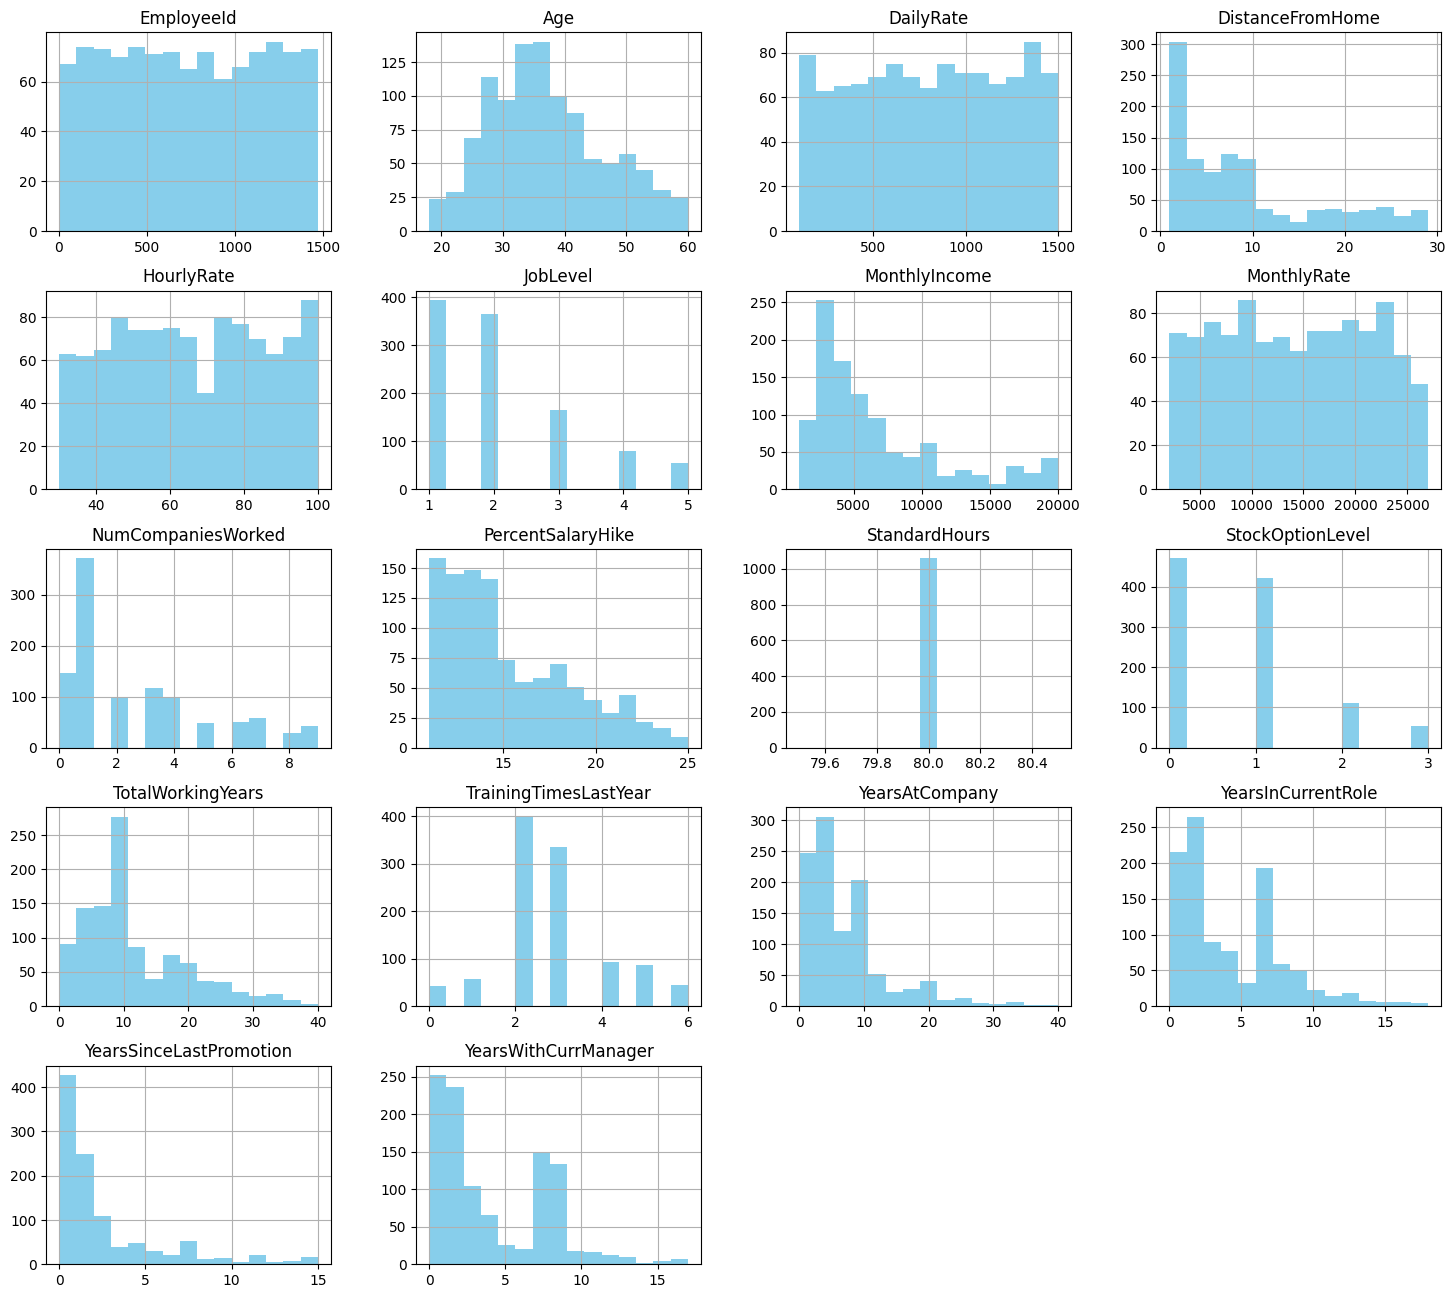

In [ ]:
# Numerical Univariate Analysis
plot_num_uni(df, num_cols)

Based on the histogram plots above, several numerical features exhibit a right-skewed distribution, meaning the data is concentrated on the left with a long tail extending to the right. These include: DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.

Such skewness indicates that most employees tend to have lower values for these features, while a smaller number have significantly higher values.

In contrast, features like Age and TrainingTimesLastYear display a more symmetrical distribution, which is closer to a normal (bell-shaped) curve. This suggests a relatively balanced spread of values around the mean for these attributes.

Meanwhile, features like EmployeeID and StandardHours are not suitable for statistical interpretation in this context. For instance, StandardHours has a constant value for all entries, and EmployeeID is merely an identifier.

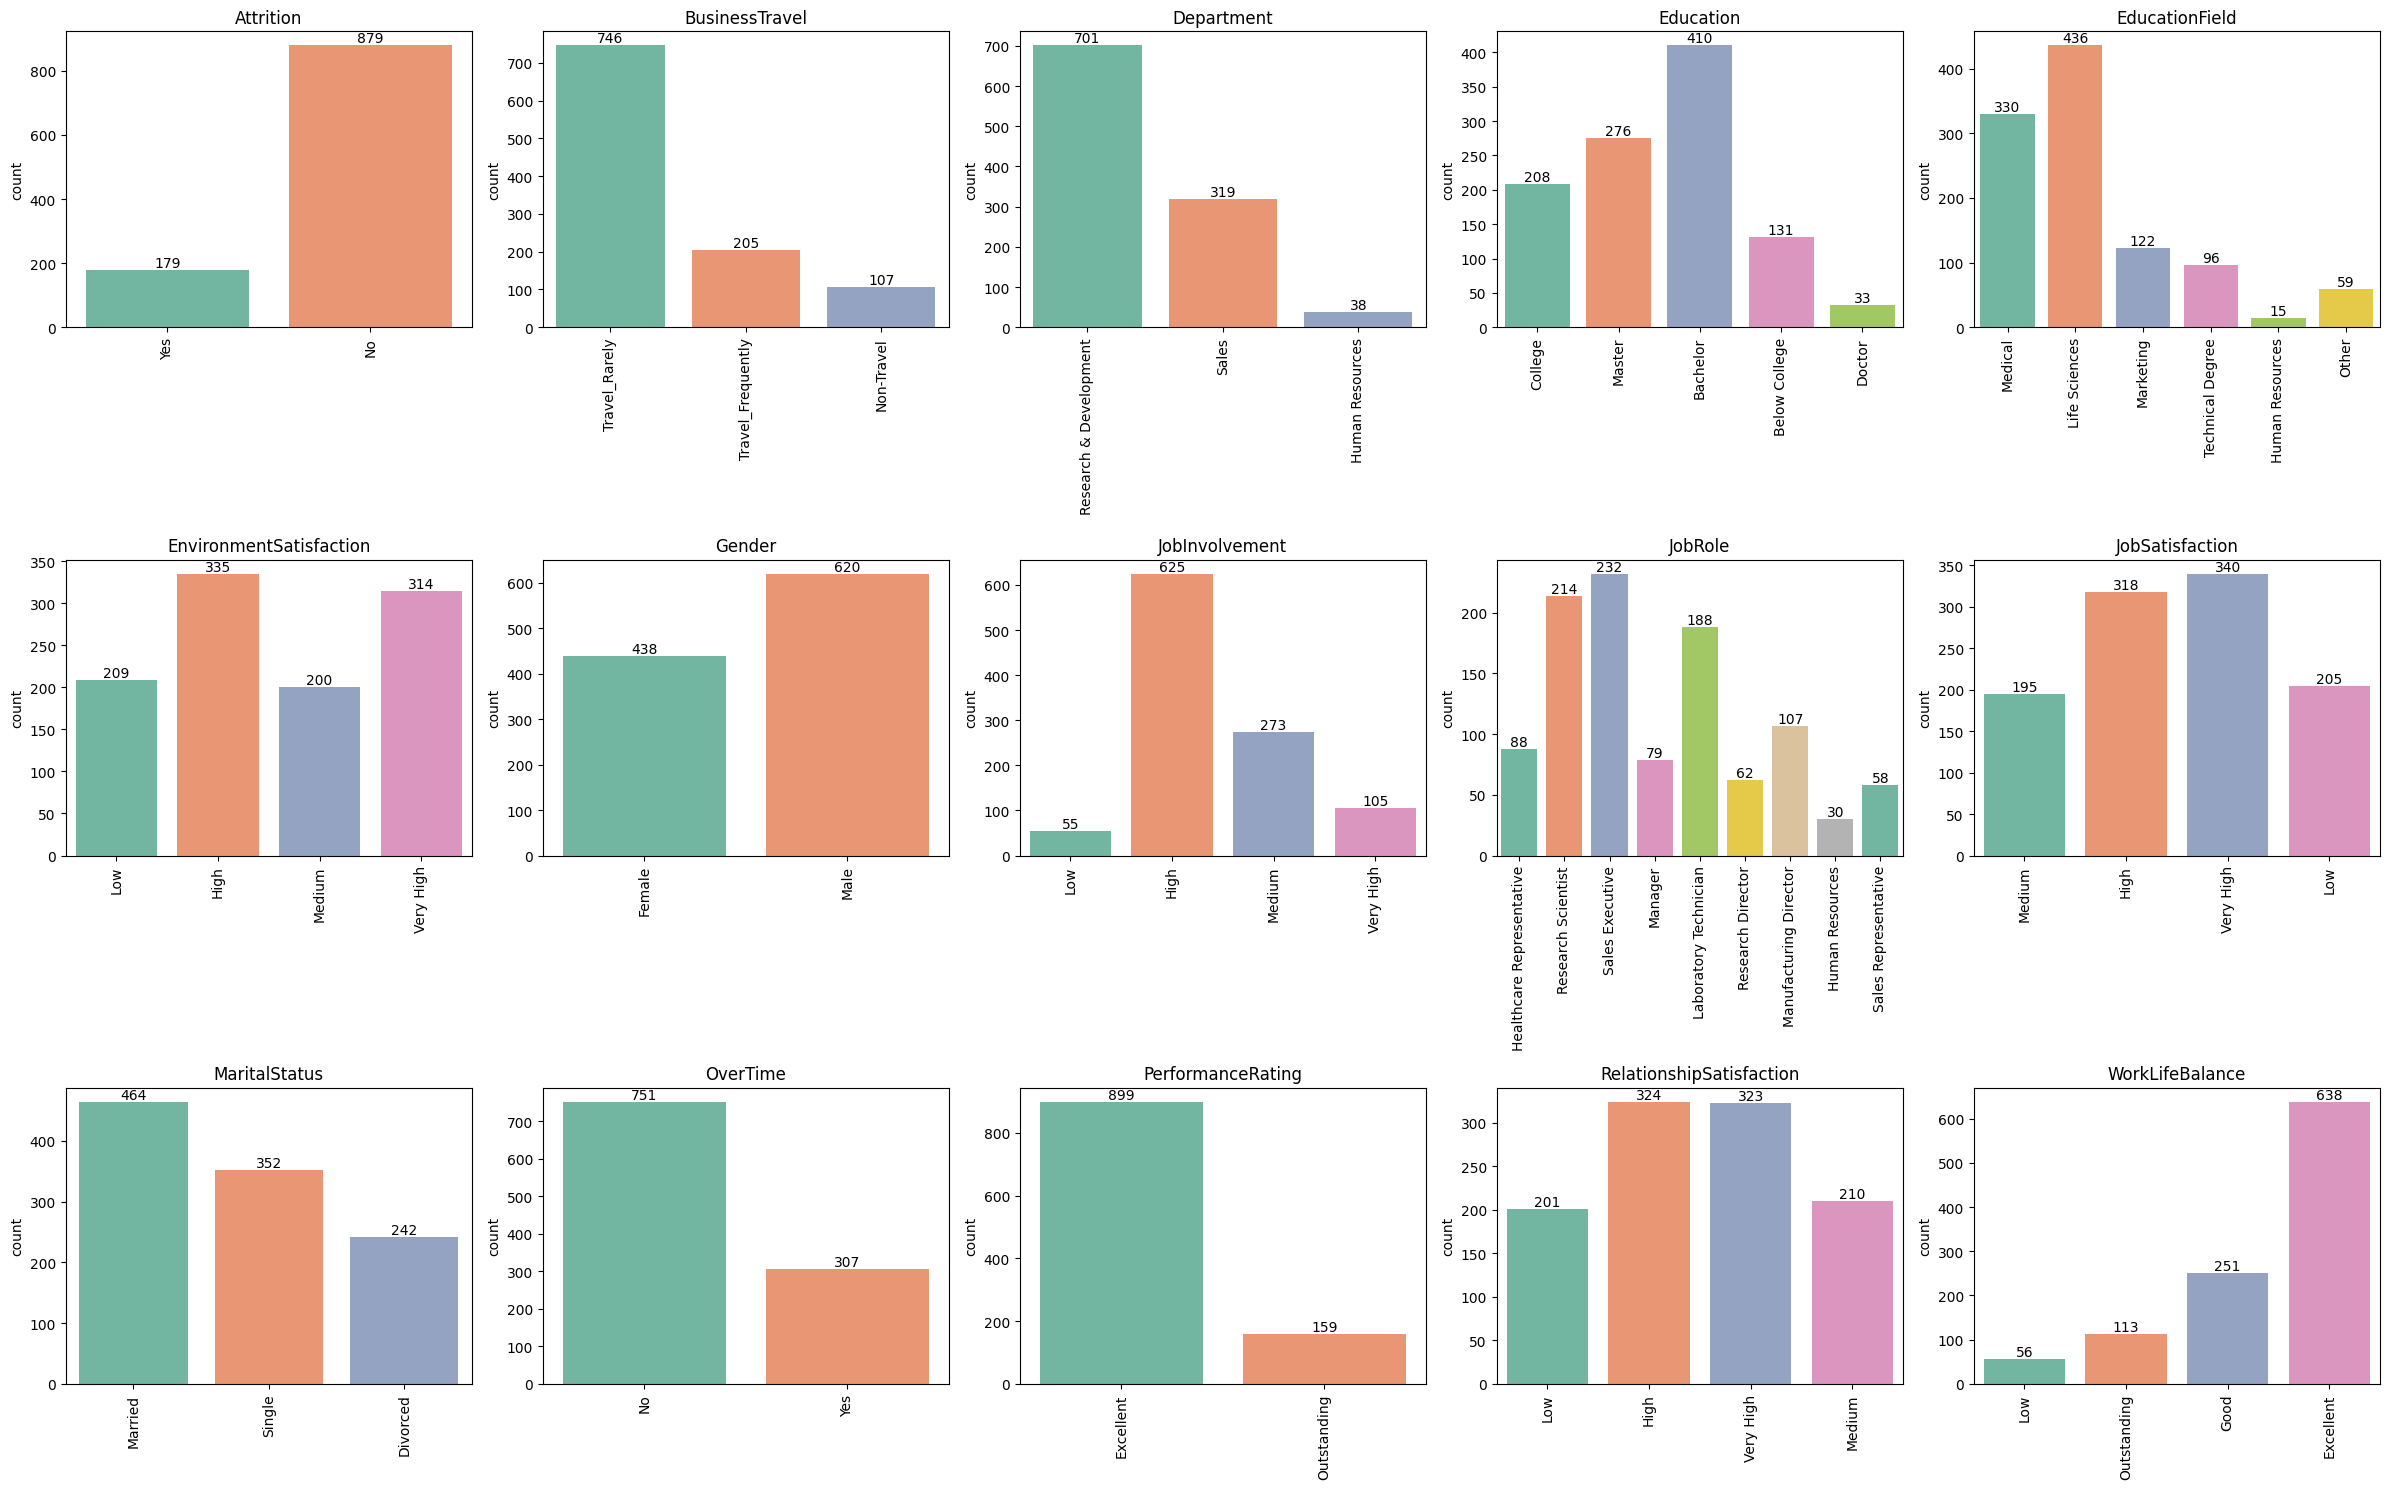

In [ ]:
# Categorical Univariate Analysis
plot_cat_uni(df, cat_cols)

Based on the graph above it can be concluded that:

* Attrition: Most employees (around 880) have stayed with the company, while about 179 have left.

* Gender: The workforce is mostly male, with a much higher number than females.

* Department: The Research & Development department has the most employees, followed by Sales. HR has the fewest.

* Education: Most employees have a Bachelor's degree, followed by Master's and College-level education. Life Sciences is the most common field of study.

* Job Role: The most common role is Sales Executive, followed by Research Scientist and Laboratory Technician.

* Overtime: Many employees don’t work overtime, but about 300 do.

* Business Travel: Most employees travel rarely for business, with fewer traveling frequently or not at all.

* Marital Status: The majority of employees are married.

* Job Satisfaction & Performance: Most employees are satisfied with their jobs and have an "Excellent" performance rating.

* Job Involvement & Relationship Satisfaction: Most employees are highly engaged with their work and satisfied with their relationships at work.

* Work-Life Balance: Nearly all employees feel they have a good work-life balance, with many rating it as "Excellent."

* Environment Satisfaction: Overall, employees are satisfied with their work environment.

## Bivariate Analysis

Explore the relationship between various features and the target variable, Attrition. By comparing categorical and numerical variables with Attrition, we can identify patterns or potential factors that influence an employee's decision to leave the company.

In [ ]:
# Bivariate analysis for categorical features vs Attrition

def bivariate_cat_attrition(df, cat_features, target='Attrition'):
    n = len(cat_features)
    rows = (n // 3) + 1
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    axes = axes.flatten()

    manual_orders = {
        'EnvironmentSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
        'JobSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
        'JobInvolvement': ['Low', 'Medium', 'High', 'Very High'],
        'RelationshipSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
        'WorkLifeBalance': ['Low', 'Good', 'Excellent', 'Outstanding'],
        'PerformanceRating': ['Low', 'Good', 'Excellent', 'Outstanding'],
        'Education': ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
    }

    for i, col in enumerate(cat_features):
        ax = axes[i]
        hue_order = manual_orders.get(col, None)
        sns.countplot(data=df, x=target, hue=col, palette='Set2', ax=ax, hue_order=hue_order)
        ax.set_title(f'{target} by {col}')
        ax.tick_params(axis='x', rotation=0)
        ax.grid(True, linestyle='--', alpha=0.5)

        for container in ax.containers:
          ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

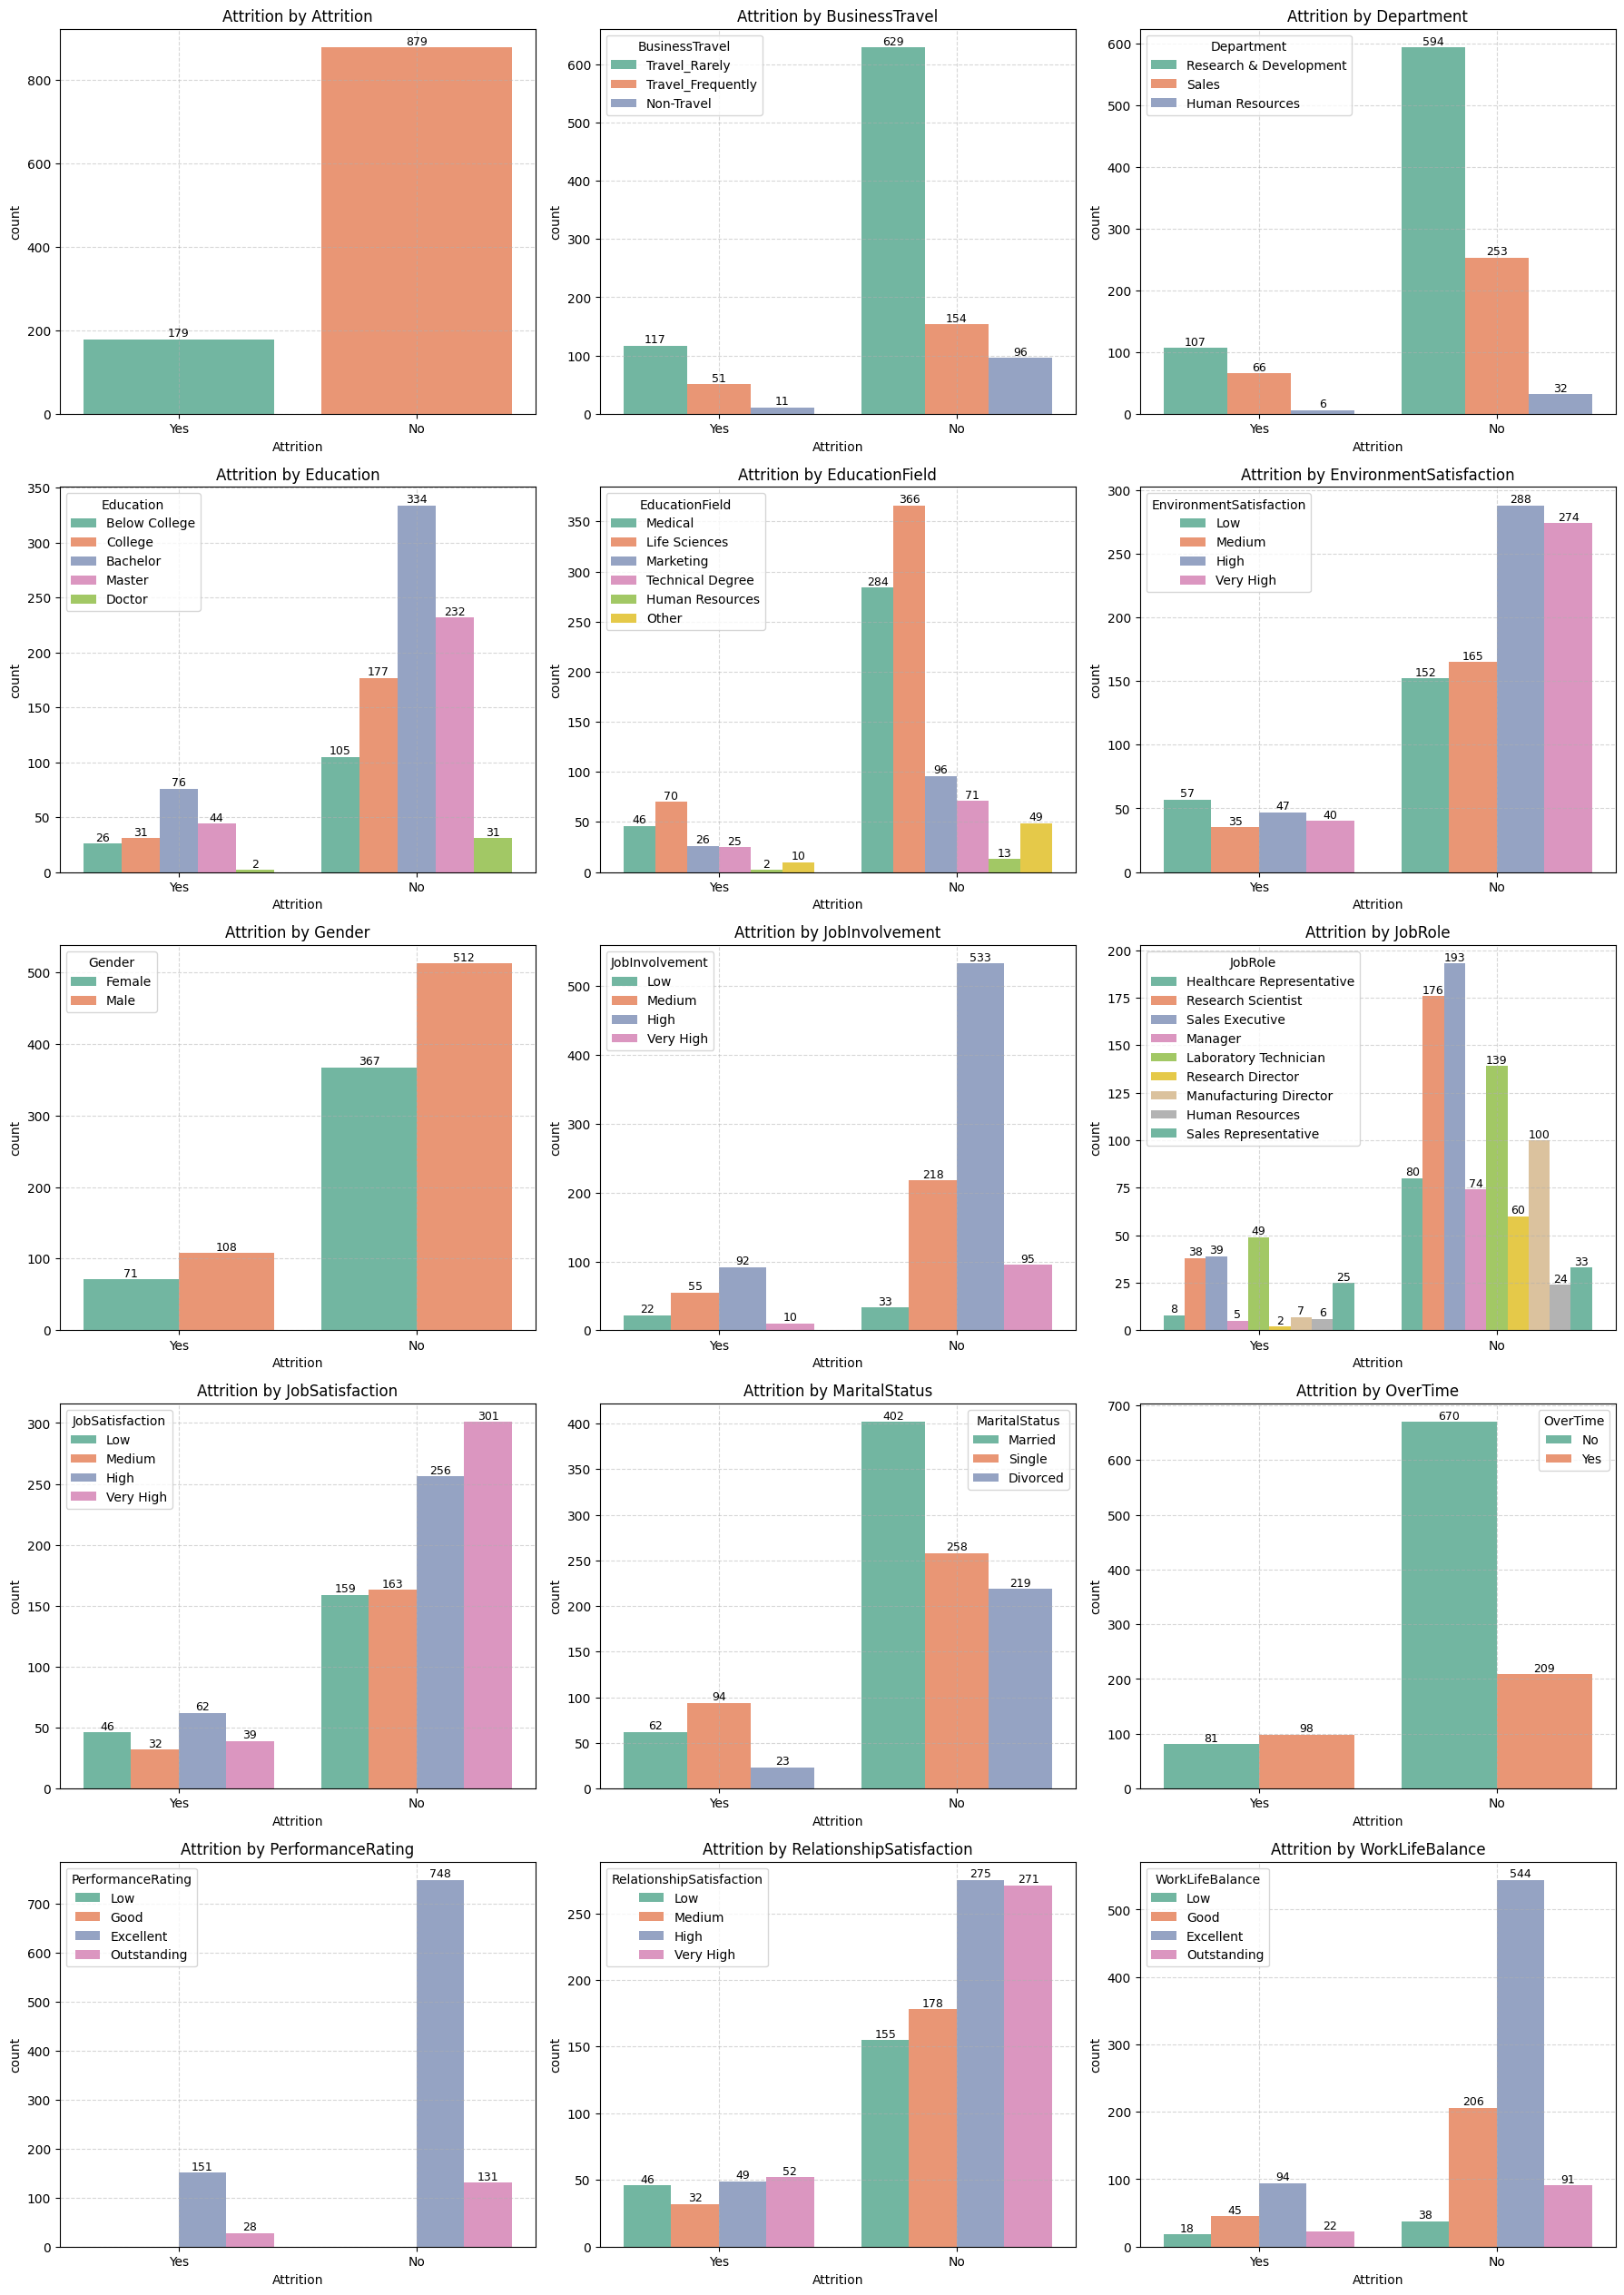

In [ ]:
bivariate_cat_attrition(df, cat_cols)

The boxplots illustrate the relationship between employee attrition and various categorical features. From the Attrition plot above, we can conclude:
1. BusinessTravel
Employees who travel frequently (Travel_Frequently) have the highest number of attrition, while those who do not travel (Non-Travel) have the least. This indicates a possible relationship between frequent business travel and higher attrition.

2. Department
The department with the most attrition is Research & Development, followed by Sales. Human Resources has the fewest attritions among the departments.

3. Education
There is no significant variation in attrition across different education levels. All education levels appear to contribute fairly evenly to attrition.

4. EducationField
Employees from the Life Sciences field experience the highest attrition, followed by Medical and Marketing. Human Resources and Other fields contribute the least to attrition.

5. EnvironmentSatisfaction
Employees who rate their environment satisfaction as either Low or High tend to have higher attrition than those with Medium or Very High satisfaction.

6. Gender
Male employees show a noticeably higher number of attrition cases than female employees.

7. JobInvolvement
Attrition occurs more frequently among employees with Medium and High job involvement levels. Low and Very High involvement levels show lower attrition.

8. JobRole
The highest attrition count comes from employees in the role of Laboratory Technician. The roles with the lowest attrition are Research Director and Manager.

9. JobSatisfaction
Employees with High job satisfaction surprisingly show the highest attrition count, followed by Medium. Very High and Low levels of job satisfaction show fewer attritions.

10. MaritalStatus
Single employees have the highest attrition numbers, followed by Married. Divorced employees show the lowest attrition.

11. OverTime
Employees who work overtime have significantly higher attrition than those who do not, making this one of the most visually prominent patterns.

12. PerformanceRating
Almost all employees fall under the "Excellent" rating, making this feature uninformative for analyzing attrition differences.

13. RelationshipSatisfaction
Attrition is distributed relatively evenly across satisfaction levels, with a slightly higher count in the "Very High" group. The differences are not substantial.

14. WorkLifeBalance
Attrition is highest among those who rate their work-life balance as Excellent, with fewer attritions in other categories such as Good and Outstanding.

The most influential categorical features associated with employee attrition are: **OverTime, BusinessTravel, JobRole, JobSatisfaction, JobInvolvement, MaritalStatus, Gender, and WorkLifeBalance.** These variables display clear and consistent differences in distribution between employees who left and those who stayed, indicating their strong association with attrition. Among them, OverTime and BusinessTravel show particularly strong patterns, while roles such as Laboratory Technician and statuses like being Single also stand out as high-risk groups.

In [ ]:
# Bivariate analysis for numerical features vs Attrition

def bivariate_num_attrition(df, num_features, target='Attrition'):
    n = len(num_features)
    rows = (n // 3) + 1
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(num_features):
        ax = axes[i]
        sns.boxplot(data=df, x=target, y=col, ax=ax)
        ax.set_title(f'{col} by {target}')
        ax.grid(True, linestyle='--', alpha=0.5)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

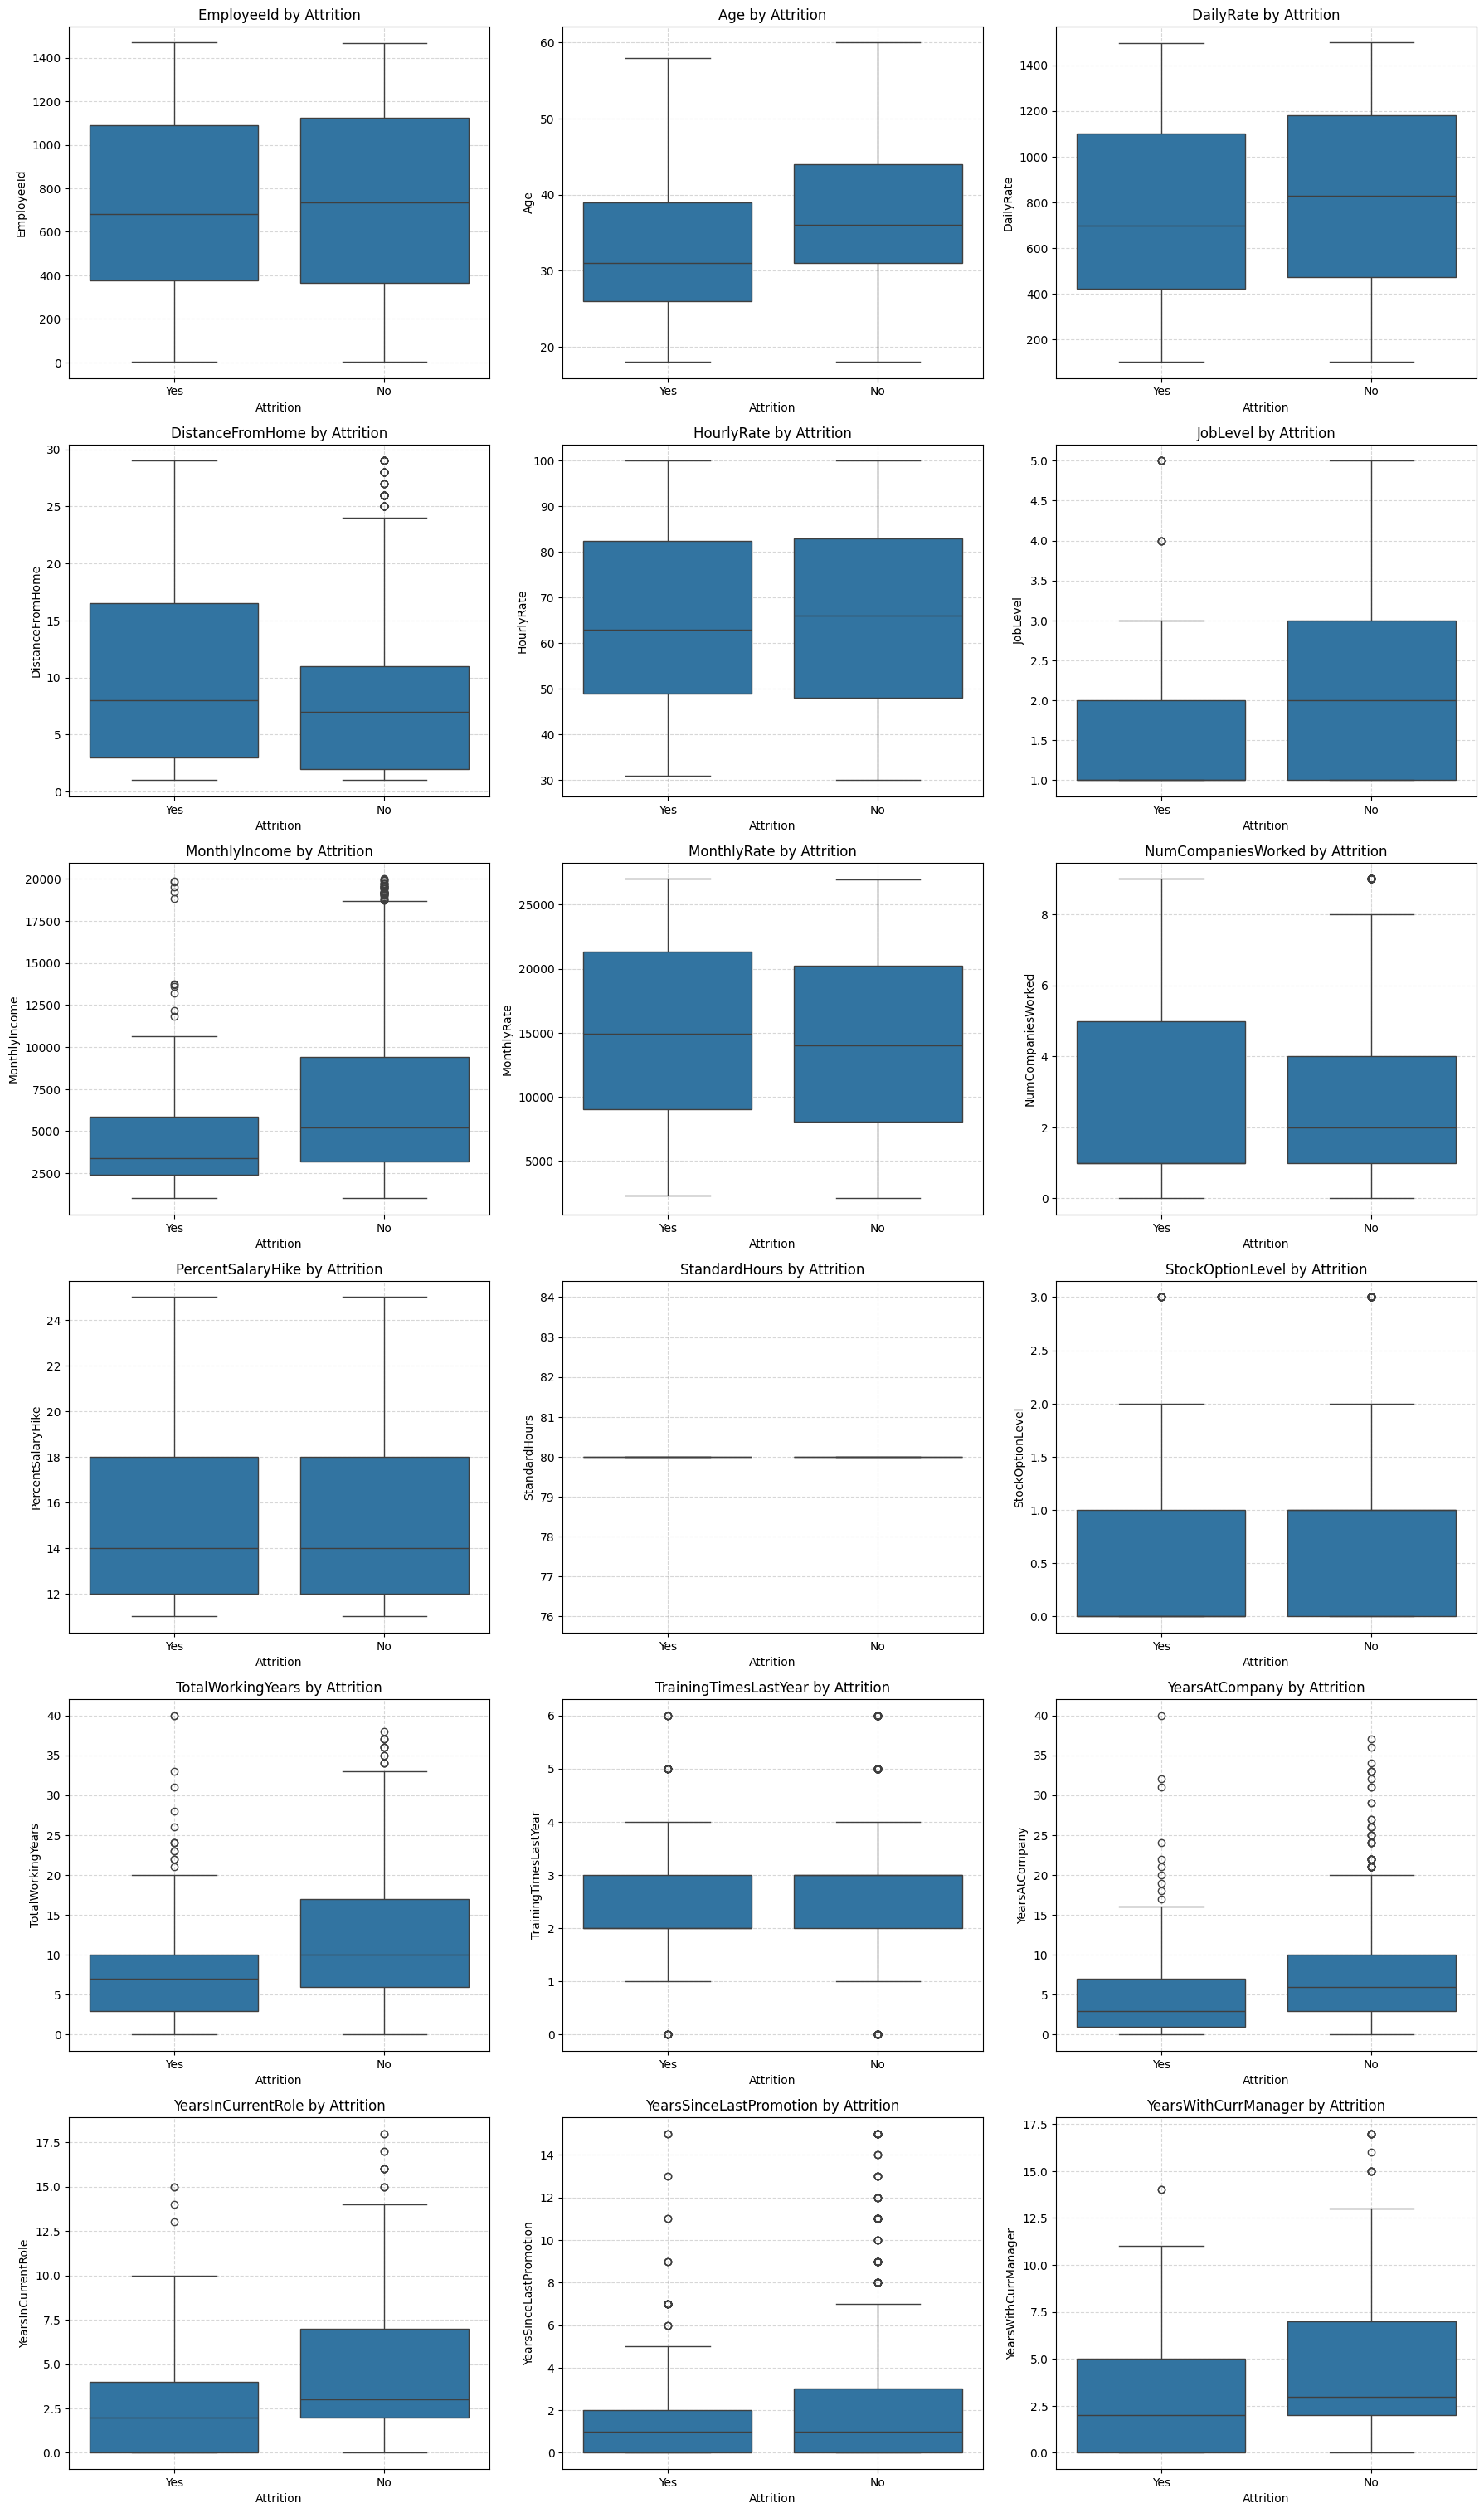

In [ ]:
bivariate_num_attrition(df, num_cols)

The boxplots illustrate the relationship between employee attrition and various numerical features. From the Attrition plot above, we can conclude:


1. Based on the Age, employees who left the company tend to be younger compared to those who stayed.
2. Based on the DailyRate, there is no significant difference between those who left and those who stayed, suggesting this variable does not influence attrition.
3. Based on the DistanceFromHome, employees who left tend to live slightly farther from the office, which may be a minor contributing factor.
4. Based on the Employed, more employees stayed than left, as expected, but this reflects data distribution rather than a predictor.
5. Based on the HourlyRate, the distribution is similar across both groups, indicating hourly pay is not a strong driver of attrition.
6. Based on the JobLevel, most employees who left were at lower job levels, indicating that more junior employees may be more likely to resign.
7. Based on the MonthlyIncome, employees who left generally earn less than those who stayed, indicating income may be a factor in attrition.
8. Based on the MonthlyRate, employees who left and stayed show similar distributions, implying little impact on attrition.
9. Based on the NumCompaniesWorked, those who left have worked at more companies, possibly indicating a pattern of job-hopping.
10. Based on the PercentSalaryHike, both groups received similar raises, indicating that recent salary hikes do not significantly affect attrition.
11. Based on the StandardHours, all values are the same (80), making this variable uninformative in the context of attrition.
12. Based on the StockOptionLevel, the distributions are quite similar, suggesting stock options have limited effect on attrition.
13. Based on the TotalWorkingYears, those who left tend to have less overall work experience, suggesting less-established employees are more likely to leave.
14. Based on the TrainingTimesLastYear, both groups received training at similar frequencies, indicating this is likely not a key factor in attrition.
15. Based on the YearsAtCompany, employees who left had shorter tenures, showing a correlation between low loyalty duration and attrition.
16. Based on the YearsInCurrentRole, employees who left had spent less time in their current role, suggesting role familiarity may reduce attrition.
17. Based on the YearsSinceLastPromotion, employees who left do not differ significantly from those who stayed, so this may have minimal influence on attrition.
18. Based on the YearsWithCurrManager, employees who left had shorter durations with their current manager, suggesting that stronger manager relationships may help retain staff.



Based on the analysis, the most influential numerical features associated with employee attrition are **Age, MonthlyIncome, TotalWorkingYears, YearsAtCompany, JobLevel, YearsInCurrentRole, and YearsWithCurrManager**. These features consistently show significant differences between employees who left and those who stayed, indicating that they are key factors related to attrition.



# Data Preparation / Preprocessing

In [ ]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Outstanding,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Good,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,Excellent,5,2,1,4


## Feature Selection

Some features, such as EmployeeID and StandardHours don't contribute meaningful information to the attrition prediction. Therefore, they should be removed to ensure that the machine learning model focuses only on the most relevant and influential features.

In [ ]:
df = df.drop(['EmployeeId', 'StandardHours'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,Female,...,Excellent,Low,0,15,2,Low,1,0,0,0
2,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,...,Excellent,High,3,18,2,Outstanding,10,0,2,7
3,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,Female,...,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
6,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,Male,...,Outstanding,High,3,6,2,Good,4,3,0,2
7,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,1,24,2,Excellent,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,Male,...,Excellent,Low,0,10,2,Good,10,7,1,9
1465,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,Female,...,Excellent,Very High,0,10,4,Outstanding,1,0,0,0
1467,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,Female,...,Excellent,Very High,0,1,4,Good,1,1,0,0
1468,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,Male,...,Excellent,Medium,1,6,0,Excellent,4,2,0,0


## Label Encoding

In [ ]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

In [ ]:
# Categorical features that need to be encoded
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [ ]:
le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)

## Data Normalization

In [ ]:
# Numerical features that need to be normalized
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

## Data Checking

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.452381,1,2,0.743737,1,0.357143,2,3,1,0,...,0,1,0.000000,0.375,0.333333,2,0.025,0.000000,0.000000,0.000000
2,0.785714,1,2,0.874016,1,0.107143,4,1,1,1,...,0,0,1.000000,0.450,0.333333,3,0.250,0.000000,0.133333,0.411765
3,0.571429,0,1,0.324266,2,0.892857,0,2,0,0,...,0,3,0.333333,0.575,0.333333,3,0.500,0.222222,0.266667,0.470588
6,0.523810,0,2,0.731568,2,0.000000,2,3,2,1,...,1,0,1.000000,0.150,0.333333,1,0.100,0.166667,0.000000,0.117647
7,0.880952,1,2,0.445956,1,0.035714,0,3,3,1,...,0,3,0.333333,0.600,0.333333,0,0.125,0.111111,0.066667,0.235294


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1058 non-null   float64
 1   Attrition                 1058 non-null   int64  
 2   BusinessTravel            1058 non-null   int64  
 3   DailyRate                 1058 non-null   float64
 4   Department                1058 non-null   int64  
 5   DistanceFromHome          1058 non-null   float64
 6   Education                 1058 non-null   int64  
 7   EducationField            1058 non-null   int64  
 8   EnvironmentSatisfaction   1058 non-null   int64  
 9   Gender                    1058 non-null   int64  
 10  HourlyRate                1058 non-null   float64
 11  JobInvolvement            1058 non-null   int64  
 12  JobLevel                  1058 non-null   float64
 13  JobRole                   1058 non-null   int64  
 14  JobSatisfacti

In [ ]:
df.describe().round(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,...,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000,1058.000
mean,0.454,0.169,1.604,0.506,1.266,0.285,1.654,2.255,1.466,0.586,...,0.150,1.503,0.254,0.286,0.462,0.664,0.177,0.237,0.147,0.244
std,0.224,0.375,0.665,0.292,0.517,0.287,1.622,1.325,1.215,0.493,...,0.358,1.214,0.279,0.200,0.217,0.985,0.157,0.201,0.218,0.212
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.286,0.000,1.000,0.260,1.000,0.036,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.150,0.333,0.000,0.075,0.111,0.000,0.118
50%,0.429,0.000,2.000,0.512,1.000,0.214,1.000,2.000,1.000,1.000,...,0.000,2.000,0.333,0.250,0.500,0.000,0.125,0.167,0.067,0.176
75%,0.595,0.000,2.000,0.763,2.000,0.429,4.000,3.000,3.000,1.000,...,0.000,3.000,0.333,0.400,0.500,1.000,0.225,0.389,0.200,0.412
max,1.000,1.000,2.000,1.000,2.000,1.000,4.000,5.000,3.000,1.000,...,1.000,3.000,1.000,1.000,1.000,3.000,1.000,1.000,1.000,1.000


## Data Splitting

In [ ]:
# Split the data into independent variable (X) and dependent variable (y) as a label
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [ ]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=42, stratify=y)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (846, 30)
y_train : (846,)
X_test  : (212, 30)
y_test  : (212,)


# Modeling

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluation

In [ ]:
accuracy, precision, recall, f1 = {}, {}, {}, {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy[name] = accuracy_score(y_test, y_pred)
    precision[name] = precision_score(y_test, y_pred)
    recall[name] = recall_score(y_test, y_pred)
    f1[name] = f1_score(y_test, y_pred)

model_metrics = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

model_metrics

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.707547,0.328947,0.694444,0.446429
SVM,0.764151,0.400000,0.777778,0.528302
Decision Tree,0.745283,0.285714,0.333333,0.307692
Gradient Boosting,0.844340,0.600000,0.250000,0.352941
Random Forest,0.839623,0.750000,0.083333,0.150000
KNN,0.816038,0.400000,0.166667,0.235294
Naive Bayes,0.768868,0.381818,0.583333,0.461538


Based on the evaluation metrics for each model, the Gradient Boosting Classifier has the highest model accuracy among the others, so this model will be used.

In [58]:
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

In [59]:
y_train_gb = gb_model.predict(X_train)
y_test_gb = gb_model.predict(X_test)

In [60]:
# Evaluation Report Model

def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Attrition', fontsize=10)
    plt.xlabel('Predicted Label Attrition', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       706
           1       1.00      0.79      0.88       140

    accuracy                           0.97       846
   macro avg       0.98      0.90      0.93       846
weighted avg       0.97      0.97      0.96       846



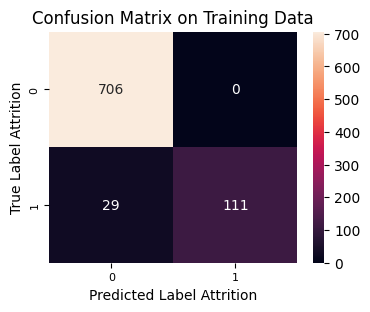

In [61]:
evaluation_report(y_train, y_train_gb, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       173
           1       0.73      0.28      0.41        39

    accuracy                           0.85       212
   macro avg       0.80      0.63      0.66       212
weighted avg       0.83      0.85      0.82       212



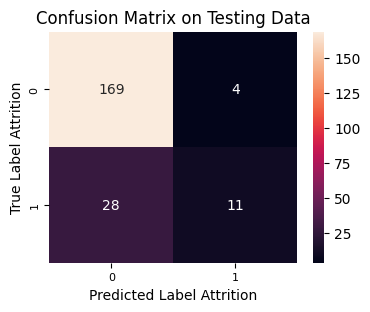

In [62]:
evaluation_report(y_test, y_test_gb, title='Testing Data')

## Hyperparameter Tuning

In [70]:
# Hyperparameter tuning using Grid Search Cross Validation

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='recall', cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1.0]},
             scoring='recall')

In [71]:
best_model = best_model.best_estimator_

In [72]:
# Predict the training and testing data using the best model
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       706
           1       1.00      1.00      1.00       140

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



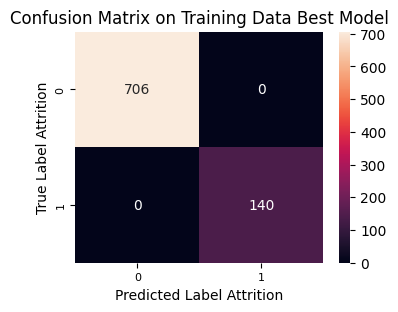

In [73]:
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       173
           1       0.78      0.46      0.58        39

    accuracy                           0.88       212
   macro avg       0.84      0.72      0.75       212
weighted avg       0.87      0.88      0.86       212



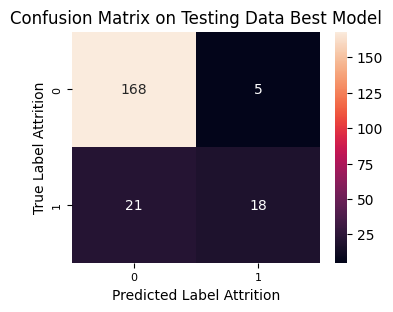

In [74]:
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

# Deployment

In [77]:
# Save the model to a file
joblib.dump(best_model, 'gb_model.joblib')

['gb_model.joblib']

In [78]:
!pip freeze > requirements.txt